1. Exploratory Data Analysis (EDA)

Load the Data

In [18]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('D:/Data science ass/15/XGBM & LGBM/Titanic_train.csv')
test_data = pd.read_csv('D:/Data science ass/15/XGBM & LGBM/Titanic_test.csv')

# Display the first few rows of the training data
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check for Missing Values

In [19]:
# Check for missing values in the training data
missing_values = train_data.isnull().sum()
print(missing_values)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Explore Data Distributions

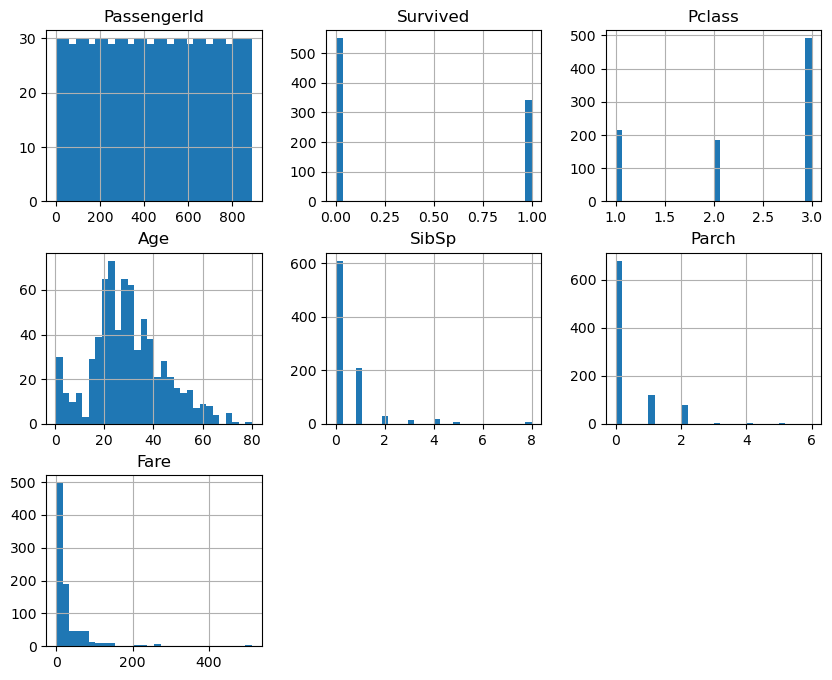

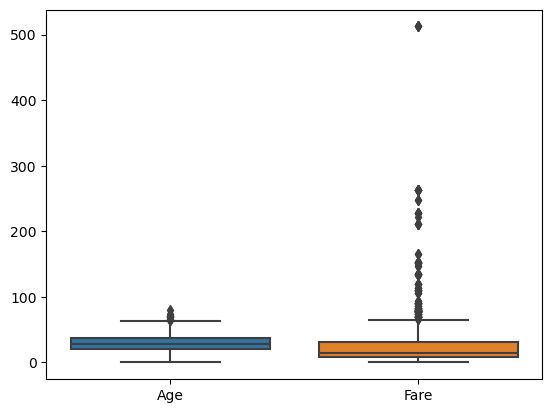

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
train_data.hist(bins=30, figsize=(10, 8))
plt.show()

# Plot box plots for numerical features
sns.boxplot(data=train_data[['Age', 'Fare']])
plt.show()


Visualize Relationships

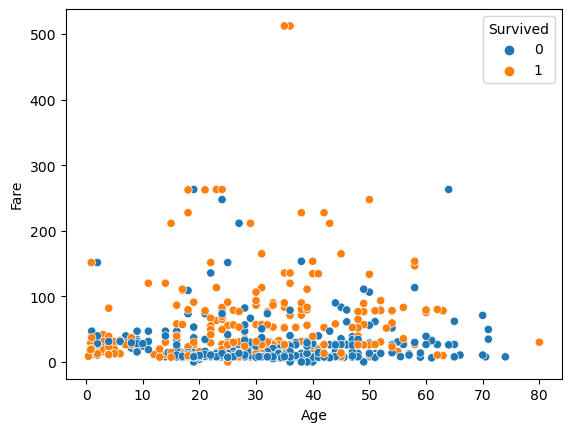

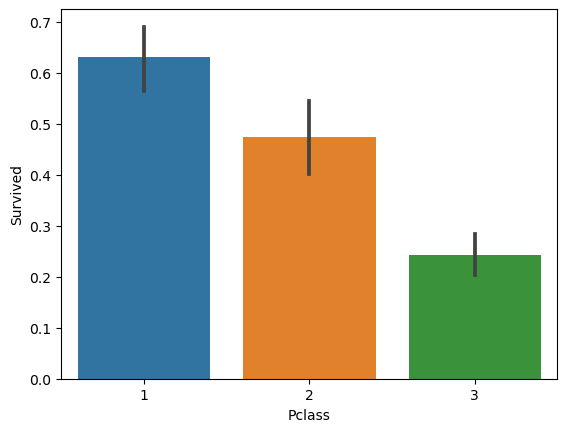

In [21]:
# Scatter plot for Age vs Fare, colored by Survival
sns.scatterplot(data=train_data, x='Age', y='Fare', hue='Survived')
plt.show()

# Bar plot for Pclass vs Survival
sns.barplot(data=train_data, x='Pclass', y='Survived')
plt.show()


2. Data Preprocessing
   
Impute Missing Values

In [22]:
# Fill missing values in the 'Age' column with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Fill missing values in the 'Embarked' column with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# Fill missing values in the 'Fare' column in test data with the median
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)


Encode Categorical Variables

In [23]:
# One-hot encode categorical features
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])


3. Building Predictive Models
   
Split the Data

In [24]:
from sklearn.model_selection import train_test_split

# Define features and target
X = train_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_data['Survived']

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Build and Evaluate Models

LightGBM

In [25]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a LightGBM dataset
train_data_lgb = lgb.Dataset(X_train, label=y_train)

# Set parameters
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_error',
}

# Train the model
lgbm_model = lgb.train(params, train_data_lgb, num_boost_round=100)

# Predict on validation set
y_pred_lgb = lgbm_model.predict(X_val)
y_pred_lgb = (y_pred_lgb > 0.5).astype(int)

# Evaluate the model
lgbm_accuracy = accuracy_score(y_val, y_pred_lgb)
lgbm_precision = precision_score(y_val, y_pred_lgb)
lgbm_recall = recall_score(y_val, y_pred_lgb)
lgbm_f1 = f1_score(y_val, y_pred_lgb)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 437
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

XGBoost

In [26]:
import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Set parameters
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
}

# Train the model
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=100)

# Predict on validation set
y_pred_xgb = xgb_model.predict(dval)
y_pred_xgb = (y_pred_xgb > 0.5).astype(int)

# Evaluate the model
xgb_accuracy = accuracy_score(y_val, y_pred_xgb)
xgb_precision = precision_score(y_val, y_pred_xgb)
xgb_recall = recall_score(y_val, y_pred_xgb)
xgb_f1 = f1_score(y_val, y_pred_xgb)


4. Comparative Analysis

Compare Performance Metrics

In [27]:
# Print performance metrics for both models
print("LightGBM Metrics:")
print(f"Accuracy: {lgbm_accuracy}")
print(f"Precision: {lgbm_precision}")
print(f"Recall: {lgbm_recall}")
print(f"F1 Score: {lgbm_f1}")

print("\nXGBoost Metrics:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1 Score: {xgb_f1}")


LightGBM Metrics:
Accuracy: 0.8044692737430168
Precision: 0.7746478873239436
Recall: 0.7432432432432432
F1 Score: 0.7586206896551724

XGBoost Metrics:
Accuracy: 0.7821229050279329
Precision: 0.7397260273972602
Recall: 0.7297297297297297
F1 Score: 0.7346938775510203


Visualize Results

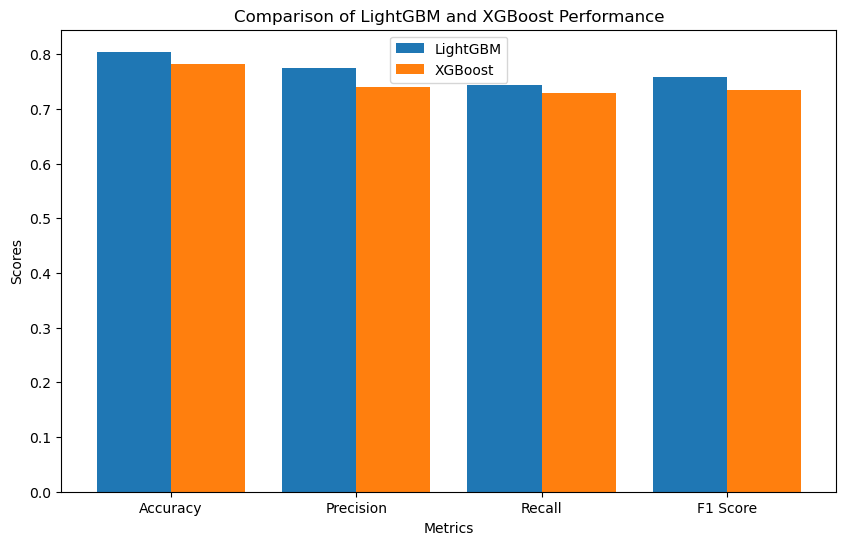

In [28]:
# Bar plot to compare model performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgbm_scores = [lgbm_accuracy, lgbm_precision, lgbm_recall, lgbm_f1]
xgb_scores = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]

plt.figure(figsize=(10, 6))
x = range(len(metrics))
plt.bar(x, lgbm_scores, width=0.4, label='LightGBM', align='center')
plt.bar([p + 0.4 for p in x], xgb_scores, width=0.4, label='XGBoost', align='center')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of LightGBM and XGBoost Performance')
plt.xticks([p + 0.2 for p in x], metrics)
plt.legend()
plt.show()


The code above outlines the steps to preprocess the Titanic dataset, build predictive models using LightGBM and XGBoost, and compare their performance. This analysis will help you identify which algorithm performs better on this specific dataset and understand their strengths and weaknesses.